In [2]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,LassoCV

In [3]:
# After downloading the X_train/X_test/Y_train .csv files in your working directory:

X_train_s = pd.read_csv('X_train.csv')
Y_train_s = pd.read_csv('Y_train.csv')
X_test_s = pd.read_csv('X_test.csv')

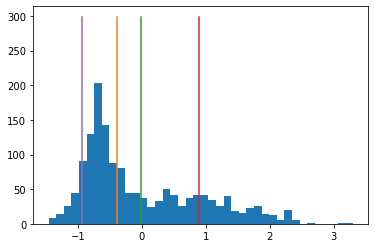

In [14]:
plt.hist(X_train_s['FR_CONSUMPTION'], bins =40)

plt.plot([X_train_s['FR_CONSUMPTION'].median()]*300,range(300))
plt.plot([X_train_s['FR_CONSUMPTION'].mean()]*300,range(300))
plt.plot([X_train_s['FR_CONSUMPTION'].mean()+X_train_s['FR_CONSUMPTION'].std()]*300,range(300))
plt.plot([X_train_s['FR_CONSUMPTION'].mean()-X_train_s['FR_CONSUMPTION'].std()]*300,range(300))

<BarContainer object of 200 artists>

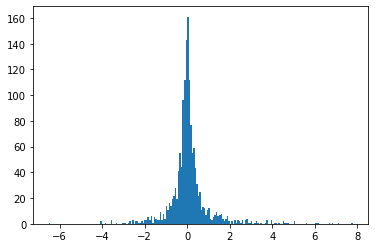

In [17]:
plt.hist(Y_train_s['TARGET'], bins =200)[2]


In [20]:
Q1,Q3 = np.percentile(Y_train_s['TARGET'] , [25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
outliers = Y_train_s['TARGET'][(Y_train_s['TARGET'] > ul) | (Y_train_s['TARGET'] < ll)]

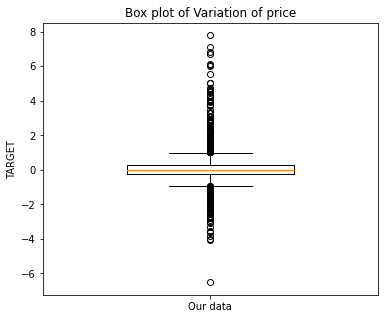

In [42]:
fig = plt.figure(figsize=(6,5))

plt.boxplot([Y_train_s['TARGET']], widths=0.5)
plt.xticks([1],['Our data'])
plt.ylabel('TARGET')
plt.title('Box plot of Variation of price')
plt.show()

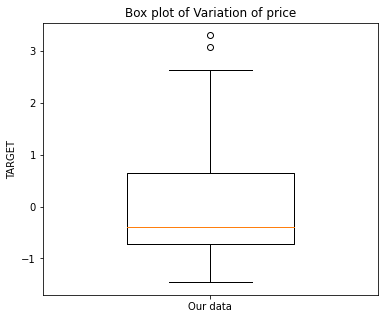

In [33]:
fig = plt.figure(figsize=(6,5))

plt.boxplot([X_train_s['FR_CONSUMPTION']], widths=0.5)
plt.xticks([1],['Our data'])
plt.ylabel('TARGET')
plt.title('Box plot of Variation of price')
plt.show()

In [40]:
X_train_s = X_train_s.fillna(0)

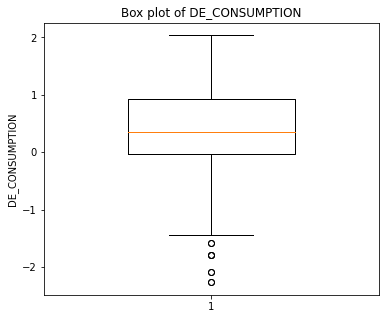

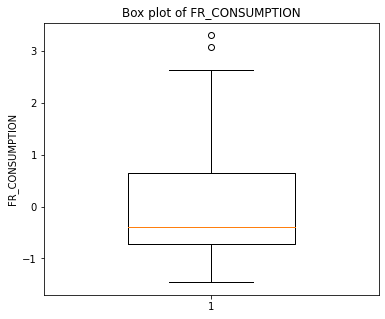

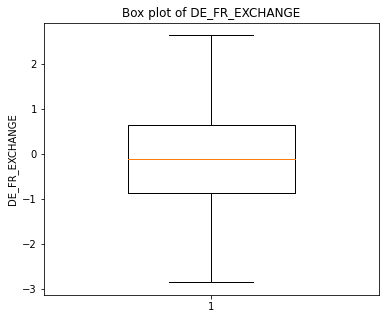

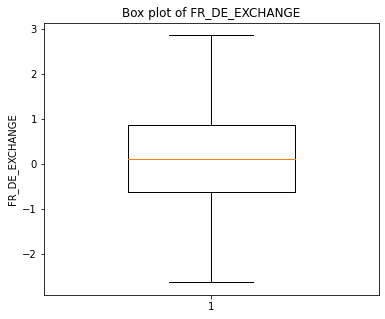

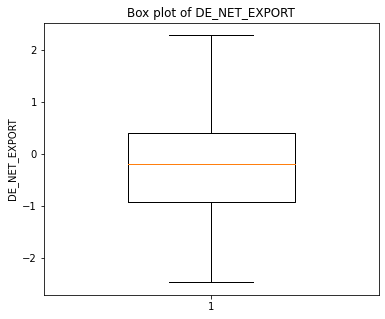

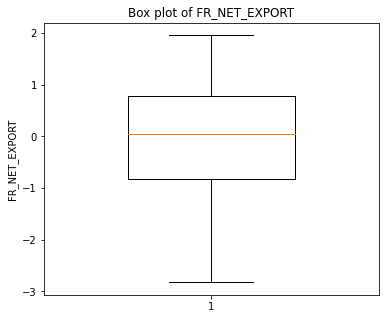

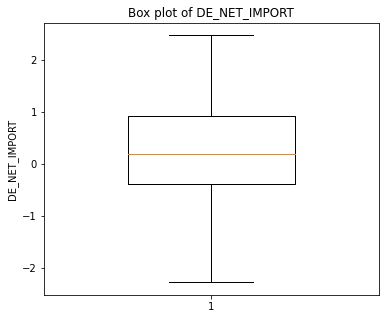

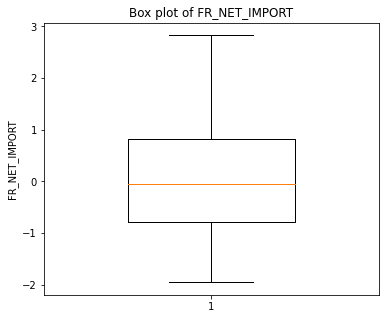

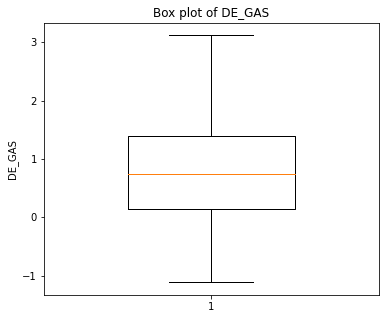

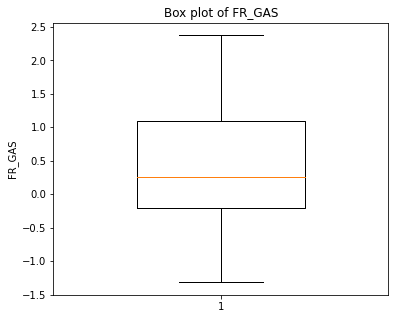

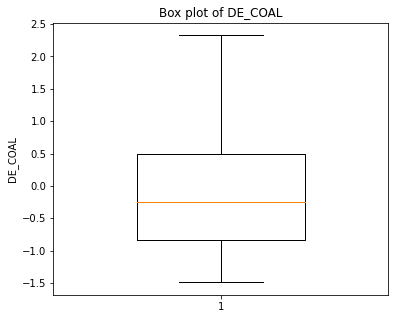

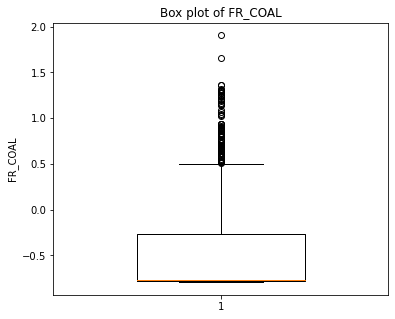

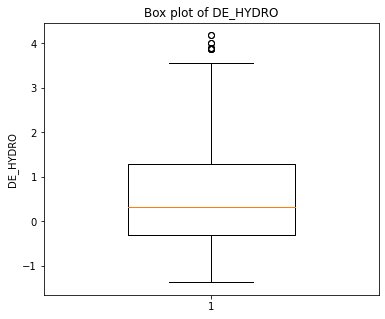

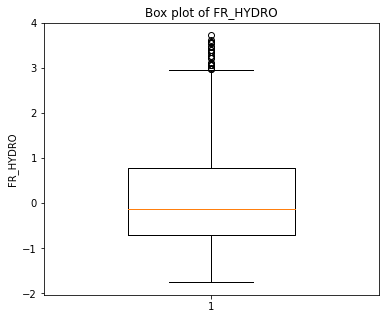

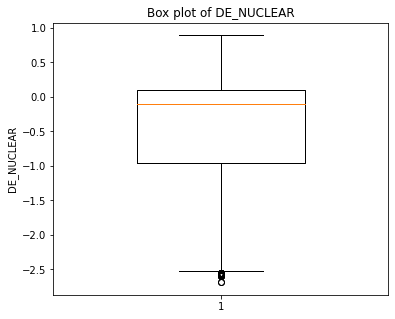

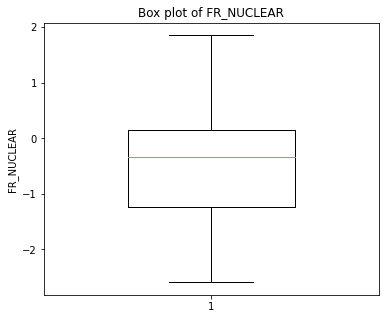

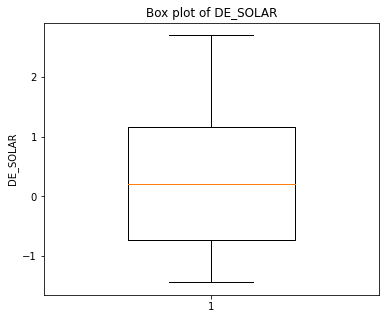

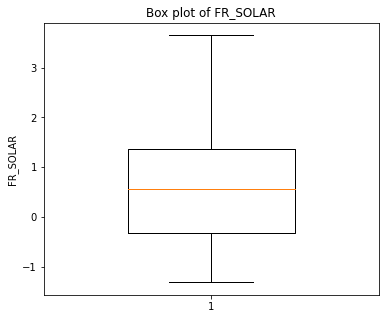

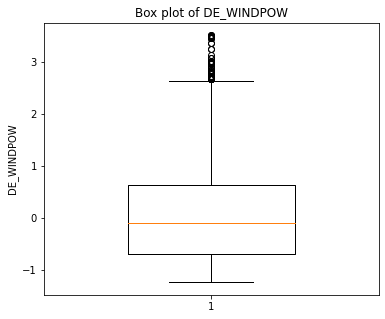

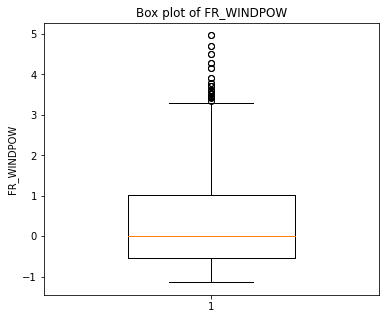

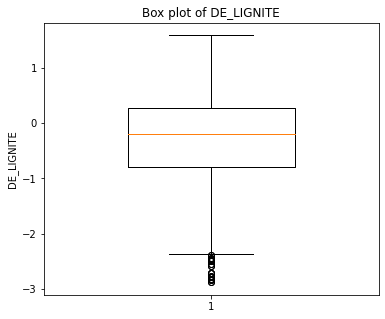

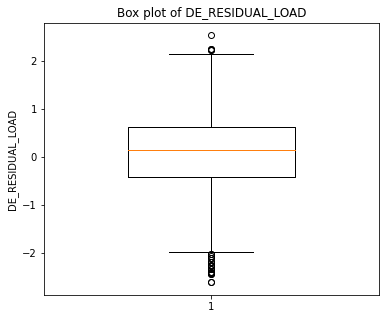

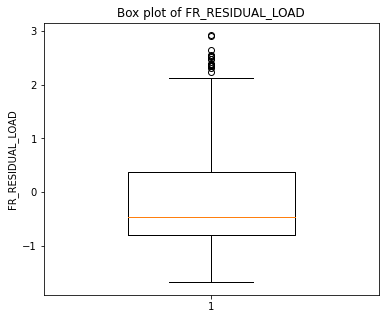

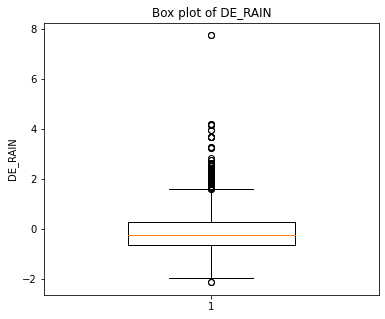

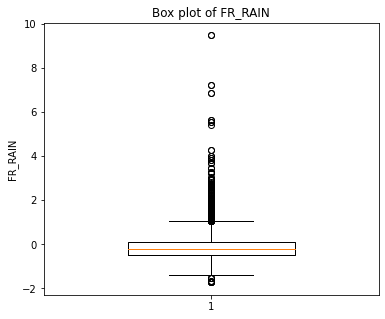

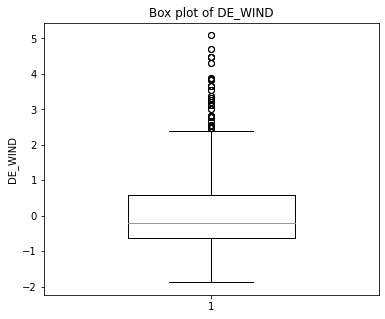

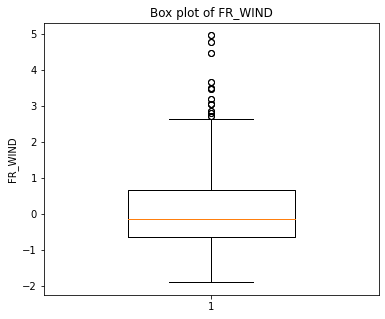

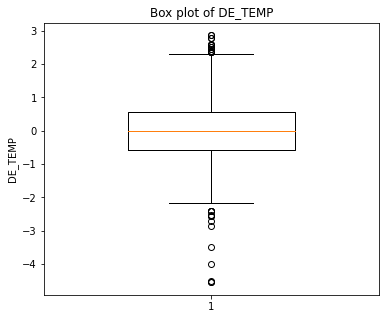

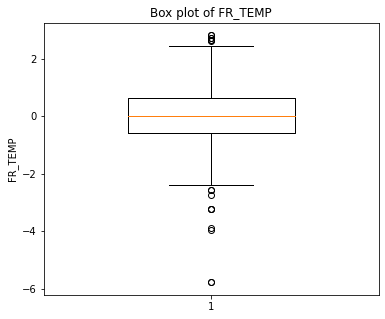

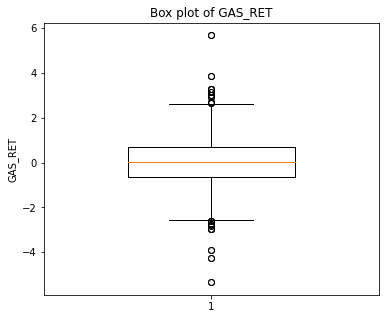

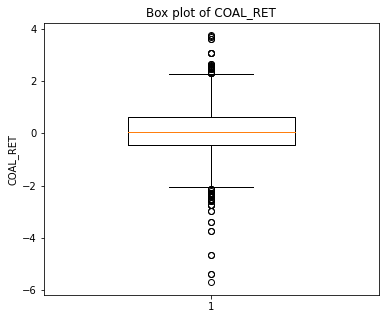

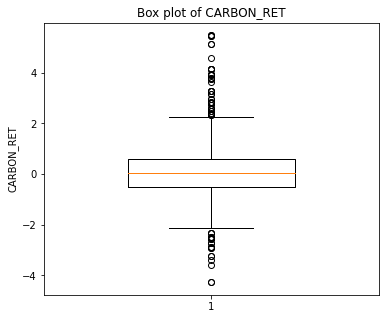

In [41]:
for key in X_train_s.keys():
    if key=='COUNTRY' or key =='ID' or key=='DAY_ID':
        continue
    fig = plt.figure(figsize=(6,5))

    plt.boxplot([X_train_s[key]], widths=0.5)
    #plt.xticks([1],['Our data'])
    plt.ylabel(str(key))
    plt.title('Box plot of '+key)
    plt.show()

In [48]:
plt.scatter3d(X_train_s['FR_RAIN'],X_train_s['FR_WIND'], X_train_s['FR_TEMP'])

AttributeError: module 'matplotlib.pyplot' has no attribute 'scatter3d'

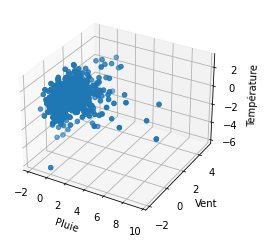

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

rain = X_train_s['FR_RAIN']
wind = X_train_s['FR_WIND'] 
temp = X_train_s['FR_TEMP']


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

ax.scatter(rain, wind, temp, marker="o")

ax.set_xlabel('Pluie')
ax.set_ylabel('Vent')
ax.set_zlabel('Température')

plt.show()

In [123]:
### Corrélation 
degree = 3#le meilleur c'est 2
# Créer un objet PolynomialFeatures pour transformer les données d'entrée en des fonctions polynomiales
poly = PolynomialFeatures(degree=degree)

In [94]:
X_poly = poly.fit_transform(X_train_s.drop('COUNTRY', axis=1))

In [95]:
names = poly.get_feature_names_out()

In [96]:
X_poly = pd.DataFrame(X_poly).rename(columns={i: names[i] for i in range(len(names))})

In [97]:
a = pd.concat([X_poly,Y_train_s['TARGET']], axis = 1)

In [98]:
corr =a.corr()

In [107]:
corr['TARGET'].sort_values( ascending=False).iloc[:30]

TARGET                                     1.000000
DE_NET_EXPORT DE_SOLAR FR_WINDPOW          0.176483
DE_NET_IMPORT FR_WINDPOW^2                 0.159696
DE_NET_IMPORT DE_SOLAR^2                   0.158009
DE_NET_EXPORT FR_SOLAR FR_WINDPOW          0.152469
DE_NET_IMPORT                              0.151447
FR_CONSUMPTION DE_SOLAR DE_WINDPOW         0.150926
DE_WINDPOW DE_LIGNITE                      0.149703
DE_NET_IMPORT DE_LIGNITE^2                 0.149162
DE_WINDPOW DE_RESIDUAL_LOAD                0.147058
DE_NET_EXPORT DE_LIGNITE                   0.144507
DE_NET_EXPORT DE_NET_IMPORT FR_WINDPOW     0.142080
DE_NET_IMPORT DE_WINDPOW FR_WINDPOW        0.141374
DE_LIGNITE DE_RESIDUAL_LOAD^2              0.140626
FR_CONSUMPTION DE_NET_EXPORT DE_SOLAR      0.140007
DE_NET_IMPORT FR_COAL DE_LIGNITE           0.139760
DE_SOLAR^2 DE_RESIDUAL_LOAD                0.138879
DE_NET_IMPORT DE_WINDPOW^2                 0.138119
DE_NET_IMPORT DE_COAL FR_COAL              0.137541
DE_WINDPOW^2

In [102]:
corr['TARGET'].sort_values( ascending=False).iloc[-30:]

DE_NET_IMPORT^2 DE_WINDPOW               -0.135789
DE_NET_EXPORT^2 DE_WINDPOW               -0.135789
DE_NET_EXPORT FR_COAL^2                  -0.135944
DE_NET_EXPORT DE_COAL DE_LIGNITE         -0.136015
DE_WINDPOW FR_WINDPOW                    -0.136781
FR_COAL DE_WINDPOW DE_LIGNITE            -0.137136
FR_COAL^2 DE_WINDPOW                     -0.137151
DE_NET_EXPORT DE_COAL FR_COAL            -0.137541
DE_NET_EXPORT DE_WINDPOW^2               -0.138119
DE_COAL FR_COAL DE_WINDPOW               -0.138362
DE_NET_EXPORT FR_COAL DE_LIGNITE         -0.139760
DE_WINDPOW DE_LIGNITE DE_RESIDUAL_LOAD   -0.139914
DE_COAL DE_WINDPOW DE_LIGNITE            -0.139961
FR_CONSUMPTION DE_NET_IMPORT DE_SOLAR    -0.140007
DE_NET_EXPORT DE_WINDPOW FR_WINDPOW      -0.141374
DE_NET_EXPORT^2 FR_WINDPOW               -0.142080
DE_NET_IMPORT^2 FR_WINDPOW               -0.142080
DE_WINDPOW DE_LIGNITE^2                  -0.142347
DE_WINDPOW DE_RESIDUAL_LOAD^2            -0.142375
DE_WINDPOW^2                   

In [111]:
X_try = X_poly[['DE_NET_EXPORT DE_SOLAR FR_WINDPOW','DE_NET_IMPORT FR_WINDPOW^2','DE_NET_IMPORT DE_SOLAR^2' ,              
            'DE_NET_EXPORT FR_SOLAR FR_WINDPOW', 'DE_NET_EXPORT','FR_CONSUMPTION DE_SOLAR DE_WINDPOW',  
                'DE_WINDPOW DE_LIGNITE' ,'DE_NET_IMPORT DE_LIGNITE^2' ,'DE_WINDPOW DE_RESIDUAL_LOAD'   ,
                'DE_NET_EXPORT DE_LIGNITE' ,'DE_NET_EXPORT DE_NET_IMPORT FR_WINDPOW','DE_NET_IMPORT DE_WINDPOW FR_WINDPOW',
'DE_LIGNITE DE_RESIDUAL_LOAD^2',   'FR_CONSUMPTION DE_NET_EXPORT DE_SOLAR',     'DE_NET_IMPORT FR_COAL DE_LIGNITE' ,          
'DE_SOLAR^2 DE_RESIDUAL_LOAD',       'DE_NET_IMPORT DE_WINDPOW^2' ]]

In [118]:
##Quand on choisis degree qui n'est pas celui de la fonction défini plus haut oa un gros MSE. 
##On peut choisir de faire une LASSO REGRESSION, RIDGE REGRESSSION


# Diviser les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X_try, Y_train_s['TARGET'], test_size=0.3, random_state=56)


#Q1,Q3 = np.percentile(y_train , [25,75])
#IQR = Q3 - Q1
#ul = Q3+2*IQR
#ll = Q1-2*IQR

#index = np.where((y_train < ul) & (y_train > ll))[0]

#X_train = np.array(X_train)[index,:]
#y_train = np.array(y_train)[index]


# Définir le degré du polynôme
degree = 1#le meilleur c'est 2


# Créer un objet PolynomialFeatures pour transformer les données d'entrée en des fonctions polynomiales
poly = PolynomialFeatures(degree=degree)

# Transformer les données d'entrée en des fonctions polynomiales
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

## on normalise les variables
X_train_poly = -1+2*(X_train_poly-X_train_poly.min())/(X_train_poly.max()-X_train_poly.min())#(X_train_poly-X_train_poly.mean())/X_train_poly.std()
X_test_poly =  -1+2*(X_test_poly-X_train_poly.min())/(X_train_poly.max()-X_train_poly.min()) #(X_test_poly-X_test_poly.mean())/X_test_poly.std()



# Créer un objet LinearRegression pour ajuster un modèle de régression LASSO
#reg = LinearRegression () #100% quand on a le bon degrée
reg = Lasso(alpha=0.00065)#alpha=.016) #parait le mieux 

# Entraîner le modèle de régression sur les données d'entraînement
reg.fit(X_train_poly, y_train)

# Faire des prédictions sur les données de test
y_pred = reg.predict(X_test_poly)
y_pred_train = reg.predict(X_train_poly)

# Calculer l'erreur quadratique moyenne 
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)
#y_pred = np.random.normal(0,1,(449,))
print("Sur les données de train :\n {:.1f}%".format(100 * spearmanr(y_pred_train, y_train).correlation))
print("Corrélation (Spearman) pour les données d'entrainement pour une caractérisation polynomiale puis une régression linéaire :\n {:.1f}%".format(100 * spearmanr(y_pred, y_test).correlation))

MSE: 53.371104180725574
Sur les données de train :
 23.3%
Corrélation (Spearman) pour les données d'entrainement pour une caractérisation polynomiale puis une régression linéaire :
 25.1%


In [124]:
X_poly_test_s = poly.fit_transform(X_test_s.fillna(0).drop('COUNTRY', axis=1))

In [125]:
X_poly_test_s = pd.DataFrame(X_poly_test_s).rename(columns={i: names[i] for i in range(len(names))})

In [126]:
XX = X_poly_test_s[['DE_NET_EXPORT DE_SOLAR FR_WINDPOW','DE_NET_IMPORT FR_WINDPOW^2','DE_NET_IMPORT DE_SOLAR^2' ,              
            'DE_NET_EXPORT FR_SOLAR FR_WINDPOW', 'DE_NET_EXPORT','FR_CONSUMPTION DE_SOLAR DE_WINDPOW',  
                'DE_WINDPOW DE_LIGNITE' ,'DE_NET_IMPORT DE_LIGNITE^2' ,'DE_WINDPOW DE_RESIDUAL_LOAD'   ,
                'DE_NET_EXPORT DE_LIGNITE' ,'DE_NET_EXPORT DE_NET_IMPORT FR_WINDPOW','DE_NET_IMPORT DE_WINDPOW FR_WINDPOW',
'DE_LIGNITE DE_RESIDUAL_LOAD^2',   'FR_CONSUMPTION DE_NET_EXPORT DE_SOLAR',     'DE_NET_IMPORT FR_COAL DE_LIGNITE' ,          
'DE_SOLAR^2 DE_RESIDUAL_LOAD',       'DE_NET_IMPORT DE_WINDPOW^2' ]]

In [134]:
degree = 1
poly1 = PolynomialFeatures(degree=degree)
XX2 = poly1.fit_transform(XX)


In [136]:
XX2 = -1+2*(XX2-X_train_poly.min())/(X_train_poly.max()-X_train_poly.min())

In [137]:
Y_submission = reg.predict(XX2)

In [138]:
Y_submission

array([-3.74079921e+00, -3.29355305e+00, -9.04807709e+00, -2.51479302e+00,
       -2.11621410e+00, -2.40253359e+00, -7.47163736e-01, -1.49275898e+00,
       -1.61965825e+00, -1.68641366e+00, -2.58344599e+00, -2.20583894e+00,
       -4.25737327e+00, -1.89519216e+00, -3.84395359e+00, -2.88570307e+00,
       -8.55178954e+00, -4.58113574e+00, -1.94572525e+00, -1.52404453e+00,
       -9.04123200e+00, -2.62914460e+00, -5.04351982e+00, -1.60231083e+00,
       -2.37467238e+00, -7.86832310e-01, -1.38697954e+00, -4.65817509e+00,
       -3.20052010e+00, -2.66752939e+01,  2.27622892e-01, -2.61536244e+00,
       -1.86509460e+00, -3.38485254e+00, -2.83981543e+00, -2.51027874e+00,
       -6.32379969e+00, -2.06074727e+00,  6.31622342e+00, -1.58711225e+00,
       -1.77147515e+00, -3.83976045e+00,  5.71283529e+00, -5.63723310e+00,
       -6.14261846e+00,  1.00734628e+00, -3.16899725e+00,  8.87715581e+00,
       -2.53092073e+00, -1.08636346e+01, -1.32119456e+01,  5.60142766e+00,
       -1.37034146e+00, -

In [139]:
Y_submission_sb = pd.concat([X_test_s['ID'], pd.DataFrame(Y_submission.reshape(-1,1))], axis=1).rename(columns={0: 'TARGET'}) #df2
Y_submission_sb.to_csv('LASSO30mostccorelatedPolynoms.csv', index=False)